##### Problem 1. Use the same data as earlier. Build the best MLR model you can. Why do you think yours is best? Make sure you support your choice with plots, written explanation, etc. Include at least three variables, at least one of which should be a dummy variable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
# display plots in the notebook
%matplotlib inline

housing_data = pd.read_csv('../3.03-linear-regression-part-i-lab/data/sacramento_housing_data.csv')
housing_data['state'] = ['CA' for state in housing_data['state']]
housing_data = pd.DataFrame(housing_data[(housing_data.price > 0) & (housing_data.sq__ft) > 0])

In [2]:
housing_data.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'type', u'sale_date', u'price', u'latitude', u'longitude'],
      dtype='object')

In [14]:
import statsmodels.api as sm
## dummies: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html
## df.merge
housing_data['dummy'] = [1 if x=='Residential' else 0 for x in housing_data['type'] ]


X = housing_data[['sq__ft','longitude','latitude','dummy','beds','baths']] 
y = housing_data['price'] 
X = sm.add_constant(X)

# fit our model
model = sm.OLS(y,X).fit()
model.summary()
#and generate predicted values using the model we just fit
X['predictions'] = model.predict(X)
housing_data['predictions'] = X['predictions']


#### 2 Plot the model

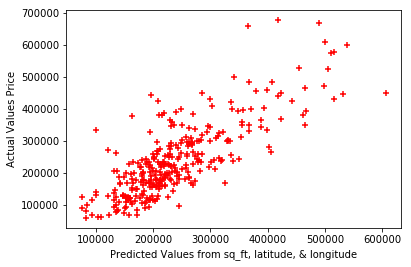

MSE: 449658766832.0


In [4]:
# Plot the model
plt.scatter(X.predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq_ft, latitude, & longitude")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", model.mse_model

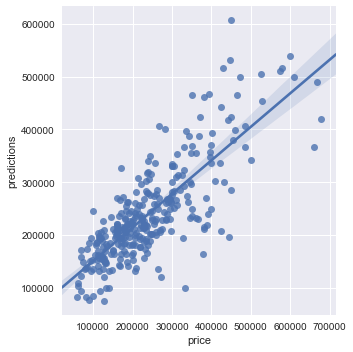

In [5]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x ='price', y = 'predictions', data = housing_data)

##### Problem 3. List the five assumptions for an MLR model. Indicate which ones are the same as the assumptions for an SLR model. 

SLR + MLR:
   - Linearity
   - Independence
   - Normality
   - Equality of Variances
   
   
MLR:
   - Independence pt 2--all 'X' variables must be independent
    

##### Problem 4. Pick at least two assumptions and articulate whether or not you believe them to be met and why.

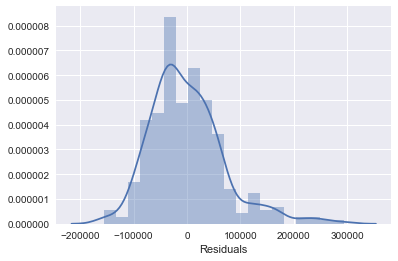

In [6]:
housing_data['Residuals'] = housing_data['price'] - housing_data['predictions']
sns.distplot(housing_data['Residuals'])

Distribution of residuals is normal--condition met; it's not exactly normal but you can see it tends toward normality

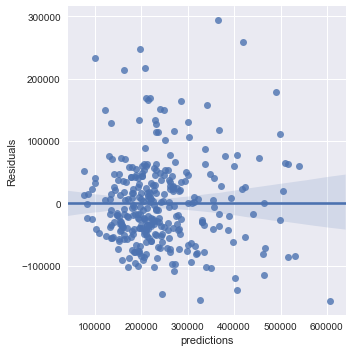

In [9]:
sns.lmplot(x = 'predictions', y='Residuals', data = housing_data)

Equality of variances:
The residuals look slightly heteroskedastic, but mostly homoskedastic. condition met.


##### Problem 5. Interpret the y-intercept and at least two of the independent variables.

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     90.22
Date:                Sat, 06 May 2017   Prob (F-statistic):           3.45e-65
Time:                        18:26:48   Log-Likelihood:                -4010.7
No. Observations:                 319   AIC:                             8035.
Df Residuals:                     312   BIC:                             8062.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.467e+07   5.61e+06      4.396      0.000    1.36e+07    3.57e+07
sq__ft       144.5264      9.691     14.914      0.000     125.459     163.594
longitude   2.178e+05      4e+04      5.438      0.000    1.39e+05    2.97e+05
latitude    4.603e+04   3.59e+04      1.280      0.201   -2.47e+04    1.17e+05
dummy       7.781e+04   1.73e+04      4.496      0.000    4.38e+04    1.12e+05
beds       -3.207e+04   7267.415     -4.413      0.000   -4.64e+04   -1.78e+04
baths         1.1e+04   8888.750      1.237      0.217   -6490.951    2.85e+04
==============================================================================
Omnibus:                       59.890   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.967
Skew:                           1.031   Prob(JB):                     3.59e-24
Kurtosis:                       4.969   Cond. No.                     2.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Surprised but all variables, aside from baths and latitude, have a statistically significant impact on price.

##### Problem 6. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. Write a few sentences interpreting some of the output.

(Hint: scikit-learn does not have this functionality built in, but statsmodels does.)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           2.97e-61
Time:                        21:04:32   Log-Likelihood:                -4027.6
No. Observations:                 319   AIC:                             8063.
Df Residuals:                     315   BIC:                             8078.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.164e+07   5.85e+06      3.697      0.000      1.01e+07  3.32e+07
sq__ft       128.2138      6.616     19.380      0.000       115.197   141.231
longitude   1.962e+05   4.17e+04      4.701      0.000      1.14e+05  2.78e+05
latitude    5.708e+04   3.77e+04      1.516      0.131      -1.7e+04  1.31e+05
==============================================================================
Omnibus:                       70.993   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.146
Skew:                           1.145   Prob(JB):                     3.03e-32
Kurtosis:                       5.383   Cond. No.                     2.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### BONUS. You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.
